In [1]:
# Library Packages 
import regex as re
import itertools as it
import spacy

%run libraries.py 
from __future__ import division

# Settings 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
seed = 7
np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore')

def front(self, n):
    return self.iloc[:, :n]

def back(self, n):
    return self.iloc[:, -n:]

# Like normalization, standardization can be useful, and even required in some
# machine learning algorithms when your time series data has input values with differing scales.

from sklearn.preprocessing import StandardScaler

def Standardisation(df):
    listed = list(df)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    df = pd.DataFrame(scaled)
    df.columns = listed
    return df



np.set_printoptions(threshold=np.nan)

!free -h

/bin/sh: free: command not found


In [2]:
glassdoor = pd.read_csv("bjs_gd.csv")

In [3]:
from datetime import datetime
from dateutil.parser import parse

glassdoor['Review Date'] = glassdoor['Review Date'].apply(lambda x: parse(x))


In [4]:
glassdoor.head()

,Title,Rating,Review Date,Current or Past Employee,Employee Title,Location,Recommends,Outlook,Approves of CEO,Full-Time or Part-Time,Time Employeed,Pros,Cons,Advice to Management
0,"""Waitress""",5.0,2017-11-15,Past,Anonymous Employee,NaN,Yes,Yes,Yes,Part-time,NaN,I loved working there it was a easy and pleasa...,When I was there management was a bit inconsis...,NaN
1,"""Senior Manager""",4.0,2017-11-10,Current,Senior Manager,"New York, NY",Yes,Neutral,Yes,Full-time,More than a year,Culture- Taking care of team members and build...,Cash flow is liquid. Major decisions made by b...,good life to work balance
2,"""Great job/company but at my location the mana...",4.0,2017-11-09,Current,Server,"Columbia, MD",Yes,Neutral,Neutral,Full-time,Less than a year,High but still affordable and reasonable price...,Inconsistencies with rules and policies. Garli...,Managers have way too much discretion. If they...
3,"""Decent company, mamangemt could be better""",3.0,2017-11-23,Current,Anonymous Employee,NaN,Yes,Yes,Neutral,Part-time,More than a year,Tips<br>Will usually work around schedule<br>Y...,Management needs better communication<br>Some ...,Communicate with fellow managers<br>Listen to ...
4,"""Pretty ok place""",3.0,2017-11-20,Current,Host,"Orlando, FL",Yes,Neutral,Neutral,Part-time,More than a year,GM is great personable but firm and respectful...,GM's attitude isn't shared amongst all manager...,NaN


In [ ]:
# Good
# Bad
# Great
# Severe

In [7]:
import re
glassdoor["Pros"] = glassdoor["Pros"].apply(lambda x: re.sub('<br\s*?>', '. ', x) )
glassdoor["Cons"] = glassdoor["Cons"].apply(lambda x: re.sub('<br\s*?>', '. ', x) )
glassdoor["Advice to Management"] = glassdoor["Advice to Management"].fillna(value="").apply(lambda x: re.sub('<br\s*?>', '. ', x) )

In [8]:
glassdoor


,Title,Rating,Review Date,Current or Past Employee,Employee Title,Location,Recommends,Outlook,Approves of CEO,Full-Time or Part-Time,Time Employeed,Pros,Cons,Advice to Management
0,"""Waitress""",5.0,2017-11-15,Past,Anonymous Employee,NaN,Yes,Yes,Yes,Part-time,NaN,I loved working there it was a easy and pleasa...,When I was there management was a bit inconsis...,
1,"""Senior Manager""",4.0,2017-11-10,Current,Senior Manager,"New York, NY",Yes,Neutral,Yes,Full-time,More than a year,Culture- Taking care of team members and build...,Cash flow is liquid. Major decisions made by b...,good life to work balance
2,"""Great job/company but at my location the mana...",4.0,2017-11-09,Current,Server,"Columbia, MD",Yes,Neutral,Neutral,Full-time,Less than a year,High but still affordable and reasonable price...,Inconsistencies with rules and policies. Garli...,Managers have way too much discretion. If they...
3,"""Decent company, mamangemt could be better""",3.0,2017-11-23,Current,Anonymous Employee,NaN,Yes,Yes,Neutral,Part-time,More than a year,Tips. Will usually work around schedule. You c...,Management needs better communication. Some ma...,Communicate with fellow managers. Listen to em...
4,"""Pretty ok place""",3.0,2017-11-20,Current,Host,"Orlando, FL",Yes,Neutral,Neutral,Part-time,More than a year,GM is great personable but firm and respectful...,GM's attitude isn't shared amongst all manager...,
5,"""Manager""",4.0,2017-11-03,Current,Anonymous Employee,NaN,Yes,Neutral,Neutral,Full-time,NaN,Very dynamic environment with a lot of differe...,little pay and no motivation,
6,"""Takeout""",3.0,2017-11-06,Past,Anonymous Employee,NaN,Yes,Yes,Neutral,Part-time,NaN,Detailed training. Trainers really get you on ...,Corporate and management are not on the same p...,Get it together. Communicate with each other a...
7,"""Great company""",5.0,2017-10-22,Current,Anonymous Employee,NaN,Yes,Neutral,Neutral,Full-time,Less than a year,Team-oriented with a focus on developing you i...,Assigned too many tables sometimes,
8,"""Awesome company""",5.0,2017-10-20,Past,Cocktail Server,"Hurst, TX",Yes,Yes,Yes,Full-time,NaN,This restaurant runs like a well-oiled machine...,I don't think there were any.,
9,"""Lot's of opportunities for advancement""",4.0,2017-10-21,Current,Anonymous Employee,NaN,Neutral,Neutral,Neutral,Part-time,NaN,"Team oriented environment, supportive management",The hourly rate for some jobs is too low.,


In [ ]:
yelp["positive"] = 0
yelp["compound"] = 0.0
yelp["negative"] = 0
yelp["neutral"] = 0

analyzer = SIA()
for sentence, row in zip(yelp["review"], list(range(yelp.shape[0]))):
    vs = analyzer.polarity_scores(sentence)
    yelp["compound"][row] = float(vs["compound"])
    if vs["compound"] < -0.5:
        yelp["negative"][row] = 1
    elif vs["compound"] > 0.5:
        yelp["positive"][row] = 1
    else:
        yelp["neutral"][row] = 1
        # print("{:-<65} {}".format(sentence, str(vs)))

worst = yelp[(yelp["rating"] == 1) & (yelp["compound"] < -.95)]
worst = worst.sort_values("date", ascending=False).head(10).reset_index()

best = yelp[(yelp["rating"] == 5) & (yelp["compound"] > .95)]
best = best.sort_values("date", ascending=False).head(10).reset_index()

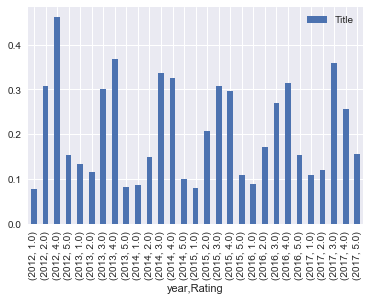

In [48]:
glassdoor_1 = glassdoor.set_index('Review Date')
glassdoor_1['year'] = glassdoor_1.index.year
counts = glassdoor_1.groupby(['year', 'Rating']).agg(len)
counts = pd.DataFrame(counts, columns=['Title'])
counts = counts.groupby(level=[0]).apply(lambda x: x / x.sum())

%matplotlib inline

counts[1:].plot(kind='bar')

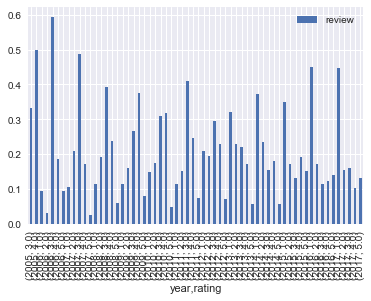

In [94]:
yelp_1 = yelp.set_index('date')
yelp_1['year'] = yelp_1.index.year
counts = yelp_1.groupby(['year', 'rating']).agg(len)
counts = pd.DataFrame(counts, columns=['review'])
counts = counts.groupby(level=[0]).apply(lambda x: x / x.sum())

%matplotlib inline

counts.plot(kind='bar')

In [95]:
counts

review
year rating          
2005 2.0     0.166667
     3.0     0.333333
     4.0     0.500000
2006 1.0     0.093750
     2.0     0.031250
     3.0     0.593750
     4.0     0.187500
     5.0     0.093750
2007 1.0     0.105263
     2.0     0.210526
     3.0     0.486842
     4.0     0.171053
     5.0     0.026316
2008 1.0     0.115385
     2.0     0.192308
     3.0     0.392308
     4.0     0.238462
     5.0     0.061538
2009 1.0     0.116071
     2.0     0.160714
     3.0     0.267857
     4.0     0.375000
     5.0     0.080357
2010 1.0     0.147887
     2.0     0.176056
     3.0     0.309859
     4.0     0.316901
     5.0     0.049296
2011 1.0     0.113924
     2.0     0.151899
     3.0     0.411392
     4.0     0.246835
     5.0     0.075949
2012 1.0     0.208633
     2.0     0.194245
     3.0     0.294964
     4.0     0.230216
     5.0     0.071942
2013 1.0     0.321429
     2.0     0.228571
     3.0     0.221429
     4.0     0.171429
     5.0     0.057143
2014 1.0     0.372642
     2.0     0.235849
     3.0     0.155660
     4.0     0.179245
     5.0     0.056604
2015 1.0     0.350254
     2.0     0.172589
     3.0     0.131980
     4.0     0.192893
     5.0     0.152284
2016 1.0     0.451477
     2.0     0.172996
     3.0     0.113924
     4.0     0.122363
     5.0     0.139241
2017 1.0     0.448529
     2.0     0.154412
     3.0     0.161765
     4.0     0.102941
     5.0     0.132353

In [101]:
count_5 = counts[counts.index(level=1)==5]

TypeError: 'MultiIndex' object is not callable

In [107]:
str_count = counts["review"]

In [109]:
str_count

year  rating
2005  2.0       0.166667
      3.0       0.333333
      4.0       0.500000
2006  1.0       0.093750
      2.0       0.031250
      3.0       0.593750
      4.0       0.187500
      5.0       0.093750
2007  1.0       0.105263
      2.0       0.210526
      3.0       0.486842
      4.0       0.171053
      5.0       0.026316
2008  1.0       0.115385
      2.0       0.192308
      3.0       0.392308
      4.0       0.238462
      5.0       0.061538
2009  1.0       0.116071
      2.0       0.160714
      3.0       0.267857
      4.0       0.375000
      5.0       0.080357
2010  1.0       0.147887
      2.0       0.176056
      3.0       0.309859
      4.0       0.316901
      5.0       0.049296
2011  1.0       0.113924
      2.0       0.151899
      3.0       0.411392
      4.0       0.246835
      5.0       0.075949
2012  1.0       0.208633
      2.0       0.194245
      3.0       0.294964
      4.0       0.230216
      5.0       0.071942
2013  1.0       0.321429
      2.0   

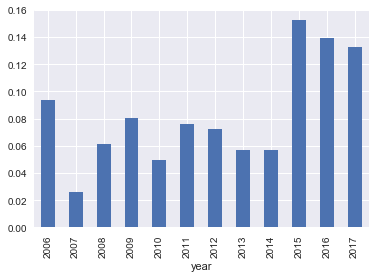

In [112]:
str_count_5 = str_count.loc[slice(None), 5.0]

str_count_5.plot(kind='bar')

In [ ]:
Now Just Going to try the averaging method:
    

In [123]:
# This is a good stat as it shows you the friend count of hte people that rated your company
# As good, I can see how you would be able to put a lot of emphasis on a report like this. 


yelp_1 = yelp.set_index('date')
yelp_1['year'] = yelp_1.index.year
avg_yp = yelp_1.groupby(['year', 'rating']).mean()
#avg = pd.DataFrame(avg, columns=['review'])

In [124]:
avg_yp = yelp_1.groupby(['year']).mean()

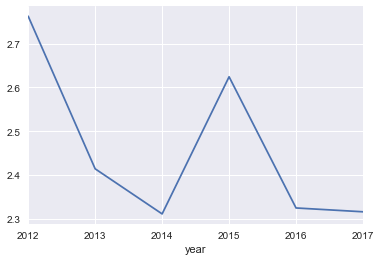

In [156]:
avg_yp['rating'].ix[min(avg_gd[1:].index):].plot(kind='line')

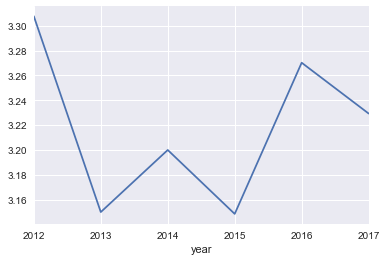

In [154]:
glassdoor_1 = glassdoor.set_index('Review Date')
glassdoor_1['year'] = glassdoor_1.index.year
avg_gd = glassdoor_1.groupby(['year']).mean()
avg_gd["Rating"][1:].plot(kind='line')

In [158]:
fund = pd.read_csv("fundamental.csv")

fund['datadate'] = fund['datadate'].apply(lambda x: parse(str(x)))

In [159]:
fund.tail()

,GVKEY,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,adrrq,curcdq,datacqtr,datafqtr,ceiexbillq,cogsq,epspi12,nopiq,reunaq,spcep12,spceq,utemq,xoprq,xsgaq,costat,mkvaltq,prccq,spcsrc
43,63739,2015-12-31,2015,4,INDL,C,D,STD,NaN,USD,2015Q4,2015Q4,NaN,186.632,1.76,-1.359,245.826,NaN,NaN,NaN,200.621,13.989,A,1072.4918,43.47,B+
44,63739,2016-03-31,2016,1,INDL,C,D,STD,NaN,USD,2016Q1,2016Q1,NaN,194.491,1.87,-0.312,242.098,NaN,NaN,NaN,210.292,15.801,A,1002.8347,41.57,B+
45,63739,2016-06-30,2016,2,INDL,C,D,STD,NaN,USD,2016Q2,2016Q2,NaN,198.694,1.96,-0.619,257.140,NaN,NaN,NaN,214.020,15.326,A,1059.1520,43.83,B+
46,63739,2016-09-30,2016,3,INDL,C,D,STD,NaN,USD,2016Q3,2016Q3,NaN,192.390,1.78,-0.322,242.812,NaN,NaN,NaN,207.529,15.139,A,839.6199,35.55,B+
47,63739,2016-12-31,2016,4,INDL,C,D,STD,NaN,USD,2016Q4,2016Q4,NaN,215.838,1.91,-0.338,208.697,NaN,NaN,NaN,231.922,16.084,A,877.6476,39.30,B+


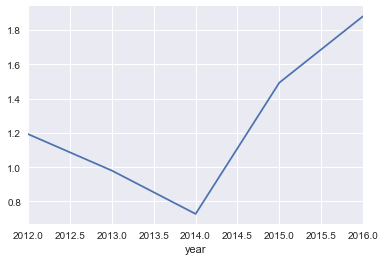

In [160]:
from datetime import datetime
from dateutil.parser import parse


fund = fund.set_index('datadate')
fund['year'] = fund.index.year
avg_f = fund.groupby(['year']).mean()
avg_f["epspi12"].ix[min(avg_gd[1:].index):].plot(kind='line')


In [130]:
avg_yp["rating"]

year
2005    3.333333
2006    3.156250
2007    2.802632
2008    2.938462
2009    3.142857
2010    2.943662
2011    3.018987
2012    2.762590
2013    2.414286
2014    2.311321
2015    2.624365
2016    2.324895
2017    2.316176
Name: rating, dtype: float64

In [134]:
min(avg_gd.index)

2010

In [155]:
avg_yp['rating'].ix[min(avg_gd[1:].index):].corr(avg_gd["Rating"])


0.20890211010089538

In [7]:
yelp = pd.read_csv("bjs-restaurant-sanbruno.csv")

In [8]:
yelp["date"] = yelp["date"].apply(lambda x: x[:10])
yelp["date"] = yelp["date"].apply(lambda x: x[:-1] if x[-1]=="\\" else x )
yelp["date"] = yelp["date"].apply(lambda x: x[:-2] if x[-1]=="n" else x )

In [9]:
from datetime import datetime
from dateutil.parser import parse

yelp['date'] = yelp['date'].apply(lambda x: parse(x))

In [10]:
yelp.head()

,Username,location,friend_count,review_count,photo_count,date,rating,review
0,Finau F.,Millbrae CA,152,38,50.0,2017-09-15,3.0,This is definitely a place you can resort to i...
1,Tanya F.,Fairfield CA,82,20,33.0,2017-09-10,1.0,Seriously the worst restaurant ever:Slow servi...
2,Michelle S.,San Francisco CA,200,143,453.0,2017-09-09,2.0,Yikes.So the venue itself is cool. Nice decor ...
3,Danielle S.,Pacifica CA,246,33,50.0,2017-08-31,4.0,Did you know that BJ's has a ton of promotions...
4,Teena N.,San Francisco CA,35,235,1076.0,2017-08-26,3.0,Second time here first time dining in. +Spina...


In [11]:
import itertools as it
import spacy

nlp = spacy.load('en')


In [12]:
sample_review = yelp["review"][0]

print(sample_review)

%%time
parsed_review = nlp(sample_review)

print(parsed_review)

In [16]:
for num, sentence in enumerate(parsed_review.sents):
    print('Sentence {}:'.format(num + 1))
    print(sentence)
    print("")

Sentence 1:
This is definitely a place you can resort to if court food doesn't cut it for you in the mall!

Sentence 2:
Personally after trying a handful of entrees I only seem to get the two same things each time I come here Parmesan Chicken and the infamous cookies n' cream Pizookie!

Sentence 3:
There's always a long wait but it's nice there's a Barnes&Noble and different shops near to roam around until they text you with your table ready!

Sentence 4:
Customer service could be improved but in such a busy chaotic place that's obviously asking to much of these young waiters/waitresses.



In [18]:
for num, entity in enumerate(parsed_review.ents):
    print('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print("")

Entity 1: two - CARDINAL

Entity 2: Parmesan Chicken - ORG

Entity 3: Pizookie - PERSON



In [26]:
np.array(zip(token_text, token_pos))

array(<zip object at 0x11d909b88>, dtype=object)

In [34]:
token_text = [token.orth_ for token in parsed_review]
token_pos = [token.pos_ for token in parsed_review]

df = pd.DataFrame({'token_text':token_text, 'part_of_speech':token_pos})

In [43]:
df

,part_of_speech,token_text
0,DET,This
1,VERB,is
2,ADV,definitely
3,DET,a
4,NOUN,place
5,PRON,you
6,VERB,can
7,VERB,resort
8,ADP,to
9,ADP,if


In [46]:
# Zip is different for Python 3 It is an itterator in three so have to be dealt with.

token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape))[:],
             columns=['token_text', 'token_lemma', 'token_shape'])

,token_text,token_lemma,token_shape
0,This,this,Xxxx
1,is,be,xx
2,definitely,definitely,xxxx
3,a,a,x
4,place,place,xxxx
5,you,-PRON-,xxx
6,can,can,xxx
7,resort,resort,xxxx
8,to,to,xx
9,if,if,xx


In [49]:
token_entity_type = [token.ent_type_ for token in parsed_review]
token_entity_iob = [token.ent_iob_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob))[:],
             columns=['token_text', 'entity_type', 'inside_outside_begin'])

,token_text,entity_type,inside_outside_begin
0,This,,O
1,is,,O
2,definitely,,O
3,a,,O
4,place,,O
5,you,,O
6,can,,O
7,resort,,O
8,to,,O
9,if,,O


In [50]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_review]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
df

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,This,-6.785319,Yes,,,,
1,is,-4.329765,Yes,,,,
2,definitely,-9.063265,,,,,
3,a,-3.983075,Yes,,,,
4,place,-8.045827,,,,,
5,you,-4.547973,Yes,,,,
6,can,-5.913871,Yes,,,,
7,resort,-11.149202,,,,,
8,to,-3.838520,Yes,,,,
9,if,-5.885849,Yes,,,,


In [52]:
# This part of the analysis is different to the on that I am used to. 

from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

In [53]:
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_review(filename):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for review in f:
            yield review.replace('\\n', '\n')
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsed_review in nlp.pipe(line_review(filename),
                                  batch_size=10000, n_threads=4):
        
        for sent in parsed_review.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

In [85]:
# Writing all the reviews to a file, each item in the list to a new line
# Import os

thefile = open('test.txt', 'w')

for item in yelp["review"].tolist():
  thefile.write("%s\n" % item)


In [86]:
#intermediate_directory = os.path.join('..', 'intermediate')

unigram_sentences_filepath = os.path.join('uni_test.txt')



In [87]:
%%time

import os
import codecs


# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 0:

    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus("test.txt"):
            f.write(sentence + '\n')

CPU times: user 14.7 s, sys: 1.59 s, total: 16.3 s
Wall time: 16.6 s


In [88]:
unigram_sentences = LineSentence(unigram_sentences_filepath)

In [89]:
for unigram_sentence in it.islice(unigram_sentences, 10, 20):
    print(u' '.join(unigram_sentence))
    print(u'')
    # Once you have a few more companies the above, bi,tri rams will go down well.

but again yike

food come out super slow

-PRON- take so long -PRON- almost ask and -PRON- never ask

the server also put -PRON- appetizer in as entree so -PRON- apps come out at the same time as -PRON- entree which be pretty frustrating

also two of -PRON- dish be straight up cold

like not kinda cold like cold

like -PRON- sweet potato fry feel like -PRON- would be sit out for 30 minute

-PRON- send -PRON- back and the server do not seem surprised or apologetic

seem kind of like the norm

the sweet potato fry be good -PRON- fried calamari be okay



In [92]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import cPickle as pickle

ModuleNotFoundError: No module named 'pyLDAvis'